## Read data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
Complaint_data = pd.read_csv('Complaint_data_cleaned.csv',)
Unemployment_data = pd.read_csv('Unemployment_data_cleaned.csv')
zips = gpd.read_file('ZIP_CODE_040114/ZIP_CODE_040114.shp')

In [3]:
Complaint_data['CMPLNT_FR_DT'] = pd.to_datetime(Complaint_data['CMPLNT_FR_DT'],errors = 'coerce')
Complaint_data['YearMonth'] = Complaint_data['CMPLNT_FR_DT'].dt.to_period('M')

# Exploratory_Analysis

Summary Statistics: 
- Calculate basic statistics (mean, median, mode, range, etc.) for both datasets.

Time Series Analysis:
- For the complaint dataset, plot the number of complaints over time.
- For the unemployment dataset, plot the unemployment rate over time.

Borough-wise Analysis
-  Investigate the distribution of complaints across different boroughs.

Geographical Analysis:
- Map the locations of the complaints using 'Latitude' and 'Longitude'.
- Examine if certain boroughs ('BORO_NM') have higher crime rates

### Summary Statistics

In [4]:
Unemployment_data.describe()

,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate
count,600.000000,600.000000,6.000000e+02,6.000000e+02,600.000000,600.000000
mean,2017.500000,6.500000,8.286492e+05,7.733643e+05,55284.833333,6.852167
std,2.874678,3.454933,3.714512e+05,3.515985e+05,36895.224388,3.461276
min,2013.000000,1.000000,2.033000e+05,1.686000e+05,7400.000000,2.900000
25%,2015.000000,3.750000,6.018000e+05,5.373750e+05,34600.000000,4.400000
50%,2017.500000,6.500000,9.108500e+05,8.656500e+05,47750.000000,5.700000
75%,2020.000000,9.250000,1.187600e+06,1.095850e+06,68725.000000,8.025000
max,2022.000000,12.000000,1.278300e+06,1.218300e+06,257300.000000,26.200000


### Time Series Analysis

#### 1. Time series of the unemployment rate over time for each borough

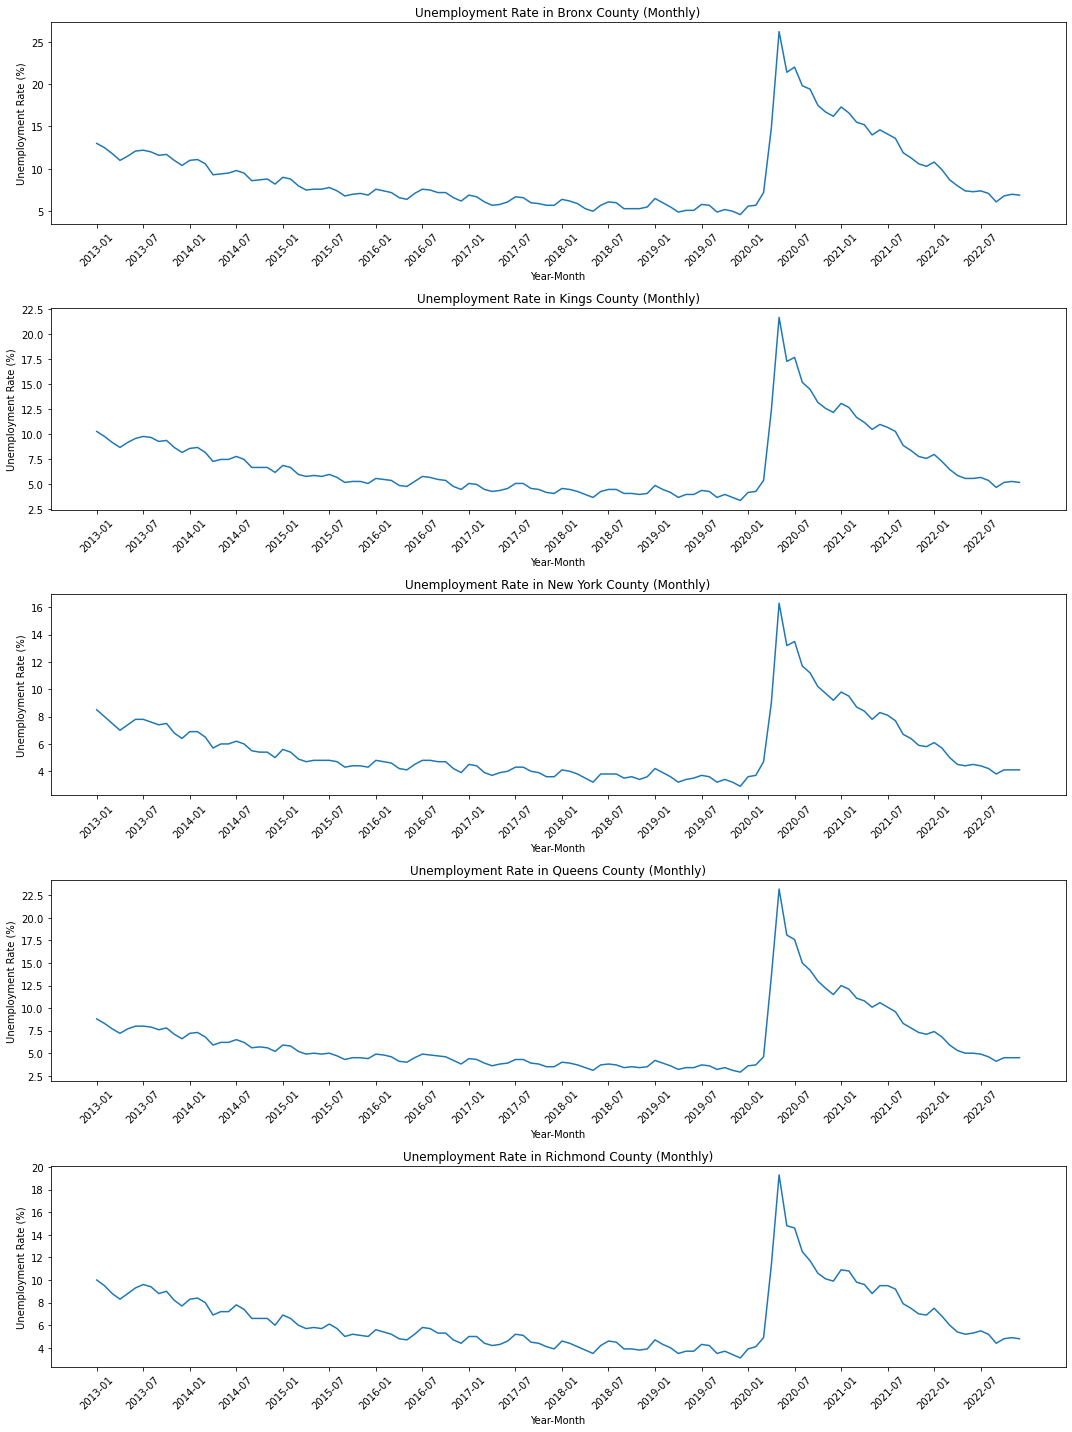

In [5]:
boroughs = Unemployment_data['Area'].unique()

# Set up the figure for plotting
plt.figure(figsize=(15, 20))

# Loop over each borough to create a time series plot
for index, borough in enumerate(boroughs, start=1):
    # Filter the dataframe for the current borough
    borough_data = Unemployment_data[Unemployment_data['Area'] == borough]
    
    # Sort the data by 'YearMonth' to ensure it's in the correct order
    borough_data = borough_data.sort_values('YearMonth')
    
    # Create a subplot for the current borough
    plt.subplot(len(boroughs), 1, index)
    plt.plot(borough_data['YearMonth'], borough_data['Unemployment Rate'], linestyle='-')
    
    # Set the title and labels
    plt.title(f'Unemployment Rate in {borough} (Monthly)')
    plt.xlabel('Year-Month')
    plt.ylabel('Unemployment Rate (%)')
    # showing only the labels for January and July of each year
    ticks = [str(year) + '-01' for year in range(2013, 2022 + 1)] + \
        [str(year) + '-07' for year in range(2013, 2022 + 1)]
    ticks = sorted(ticks)
    plt.xticks(ticks, rotation=45)
    
plt.tight_layout()
plt.show()

Interpretation:
1. General Trend: 
Each borough shows a generally stable unemployment rate with fluctuations over time. There is a significant spike observed around early 2020 across all boroughs, which sharply declines after reaching a peak.


2. Comparison Between Boroughs:
- Bronx County shows the highest unemployment rate peak, suggesting it was the most affected borough or had other compounding factors that exacerbated the impact of the pandemic on employment.

- New York County (Manhattan) and Kings County (Brooklyn) also show significant spikes but have a more rapid recovery compared to the Bronx.

- Queens County and Richmond County (Staten Island) have lower peaks than Bronx County, indicating a less severe impact or a more resilient job market during the pandemic.

3. Pre-Pandemic Variability: 
Prior to the pandemic, the unemployment rate in each borough exhibits seasonality and minor fluctuations, which could be attributed to regular economic cycles, seasonal employment patterns, and other local factors.

4. Post-Pandemic Trends: 
After the initial recovery from the pandemic's peak impact, the unemployment rates seem to return to a more stable pattern, although not entirely to pre-pandemic levels by the end of the observed data.

#### 2. Time series of  the crime over time for each borough

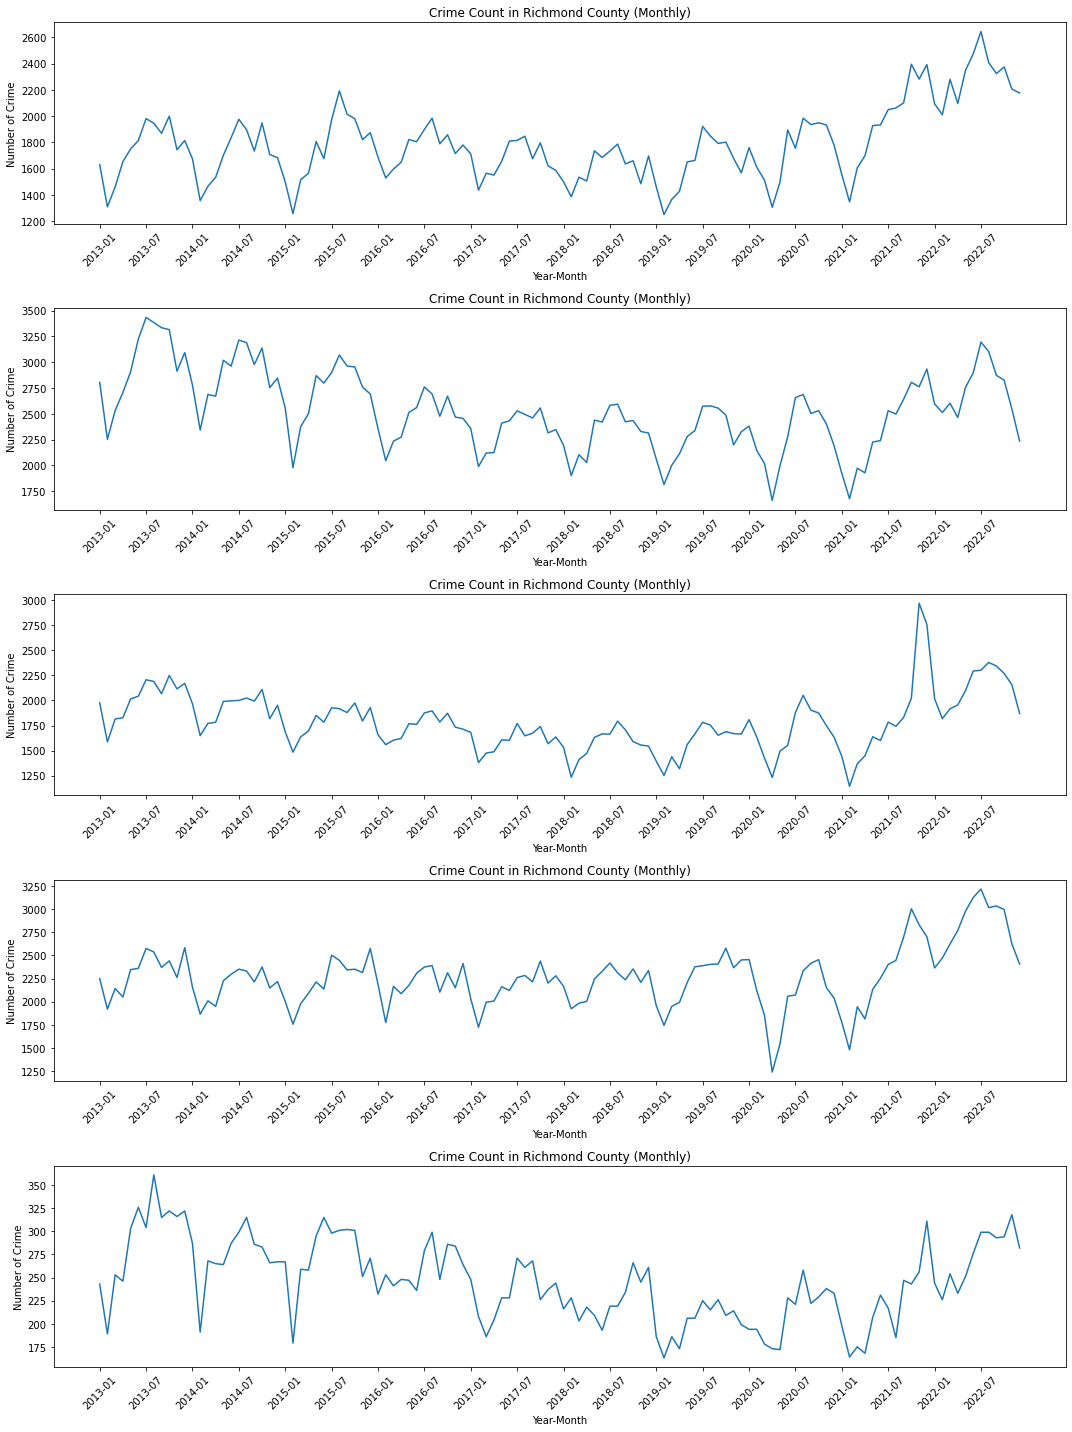

In [6]:
boroughs = Complaint_data.BORO_NM.unique()

# Set up the figure for plotting
plt.figure(figsize=(15, 20))

# Loop over each borough to create a time series plot
for index, boro in enumerate(boroughs, start=1):
    
    
    borough_data = Complaint_data[Complaint_data['BORO_NM'] == boro]
    
    # Sort the data by 'YearMonth' to ensure it's in the correct order
    # borough_data = borough_data.sort_values('YearMonth')
    # Group by crime type
    crimeByYearMonth = borough_data[['CMPLNT_NUM','YearMonth']].groupby(by='YearMonth').count()
    
    # Sort the data by 'YearMonth' to ensure it's in the correct order
    crimeByYearMonth = crimeByYearMonth.sort_values('YearMonth')
    
     # Create a subplot for the current borough
    plt.subplot(len(boroughs), 1, index)
    plt.plot(crimeByYearMonth.index.astype(str), crimeByYearMonth['CMPLNT_NUM'], linestyle='-')
    
    # Set the title and labels
    plt.title(f'Crime Count in {borough} (Monthly)')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Crime')
    # showing only the labels for January and July of each year
    ticks = [str(year) + '-01' for year in range(2013, 2022 + 1)] + \
        [str(year) + '-07' for year in range(2013, 2022 + 1)]
    ticks = sorted(ticks)
    plt.xticks(ticks, rotation=45)
    
plt.tight_layout()
plt.show()

Interpretation of the Graphs:

1. Trends: 
Each borough shows fluctuations in crime count over time. There are periods where crime peaks, as well as troughs where crime numbers are lower.

2. Seasonality: 
There appears to be some seasonality in crime counts, with certain times of the year consistently experiencing higher crime rates. This is common in crime statistics, with factors such as weather, holidays, and social events often influencing crime patterns.

3. Comparative Analysis:
All boroughs experience similar patterns in crime counts, suggesting that there might be city-wide factors affecting crime rates. The graphs for each borough seem to show some peaks and valleys at around the same times, indicating possible seasonal trends or city-wide events that impact crime rates across boroughs.

4. Consistency: 
While the crime count for each borough varies month to month, the range of variation seems consistent, suggesting that the factors affecting crime rates do not change drastically from year to year.


### Borough-wise Analysis

#### 1. Comparing the %% decomposition of type 1 crimes by category of crime

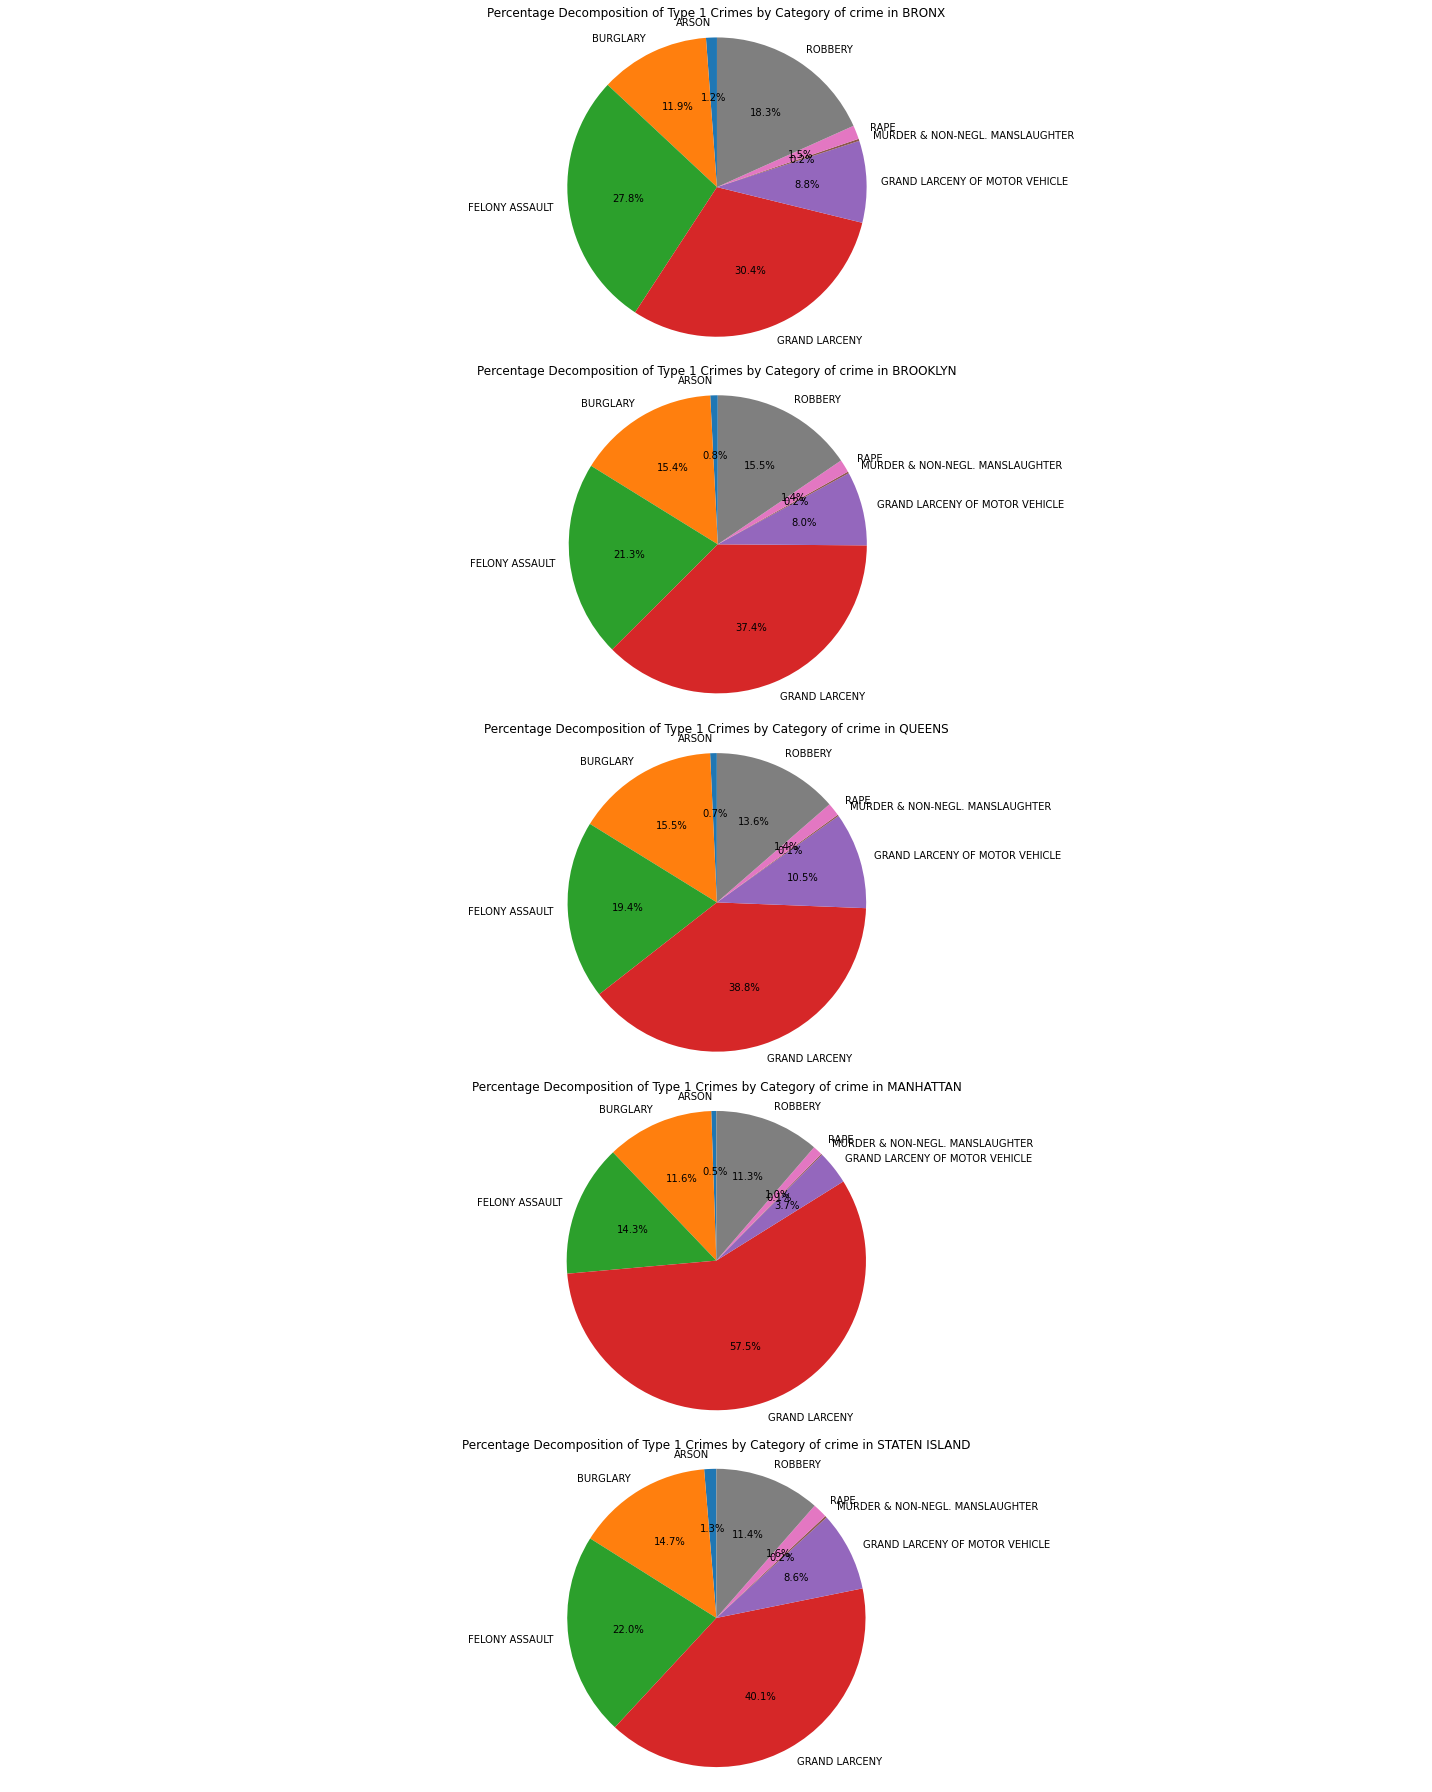

In [7]:
# plot 5 pie charts for each borough depicting % of each crime type within type 1 crimes
boroughs = Complaint_data.BORO_NM.unique()

# Set up a figure with multiple subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 25))

for i, boro in enumerate(boroughs):
    # Filter data for the borough
    each_borough_data = Complaint_data[Complaint_data['BORO_NM'] == boro]
    # Group by crime type
    crimeByType = each_borough_data[['CMPLNT_NUM','OFNS_DESC']].groupby(by='OFNS_DESC').count()
    # Calculate percentages
    crimeByType['Per_CMPLNT_NUM'] = crimeByType['CMPLNT_NUM'] / crimeByType['CMPLNT_NUM'].sum() * 100
    
    # Plot on the ith axis
    axes[i].pie(crimeByType['Per_CMPLNT_NUM'], labels=crimeByType.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title("Percentage Decomposition of Type 1 Crimes by Category of crime in "+str(boro))
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Interpretation:

- Grand Larceny is consistently one of the most common Type 1 crimes across all boroughs, with particularly high prevalence in Manhattan.

- Felony Assault also features prominently in all boroughs but is the leading crime type in the Bronx. Robbery is a significant Type 1 crime in all boroughs but does not dominate in any.

- Murder & Non-Negligent Manslaughter, while a serious crime, constitutes a smaller percentage of the Type 1 crimes across the boroughs.

- There are distinct crime profiles for each borough, indicating varying patterns of criminal activity. For example, the high percentage of Grand Larceny in Manhattan could reflect the wealthier profile of this borough and the presence of more high-value targets compared to other types of crime.

#### 2. Visualize type 1 crimes grouped on borough level as a bar plot normalized by population (per 100,000)

In [8]:
# group crime numbers by borough and normalize by their population (per 100,000). Population is given in the zips shapefile
crimeByBorough = Complaint_data[['CMPLNT_NUM','BORO_NM']].groupby(by = 'BORO_NM', as_index=False).count()
crimeByBorough.rename(columns = {'CMPLNT_NUM':'N_crimes'},inplace=True)
crimeByBorough

,BORO_NM,N_crimes
0,BRONX,214321
1,BROOKLYN,303774
2,MANHATTAN,271996
3,QUEENS,214028
4,STATEN ISLAND,29531


In [9]:
# Population by borough
popByBorough = zips[['COUNTY','POPULATION']].groupby(by = 'COUNTY',as_index=False).sum()
popByBorough

,COUNTY,POPULATION
0,Bronx,1431301.0
1,Kings,2548896.0
2,New York,1687421.0
3,Queens,2262768.0
4,Richmond,468220.0


In [10]:
# Mapping two dataframe
borough_mapping = {
    'New York': 'MANHATTAN',
    'Kings': 'BROOKLYN',
    'Richmond': 'STATEN ISLAND',
    'Queens': 'QUEENS',
    'Bronx': 'BRONX'
}
popByBorough['BORO_NM'] = popByBorough['COUNTY'].map(borough_mapping)

crimeByBoroughPop = crimeByBorough.merge(popByBorough,on = 'BORO_NM')
crimeByBoroughPop['CrimeDensity'] = crimeByBoroughPop['N_crimes']/(crimeByBoroughPop['POPULATION']/100000)
crimeByBoroughPop

,BORO_NM,N_crimes,COUNTY,POPULATION,CrimeDensity
0,BRONX,214321,Bronx,1431301.0,14973.859447
1,BROOKLYN,303774,Kings,2548896.0,11917.865617
2,MANHATTAN,271996,New York,1687421.0,16119.036091
3,QUEENS,214028,Queens,2262768.0,9458.680696
4,STATEN ISLAND,29531,Richmond,468220.0,6307.077869


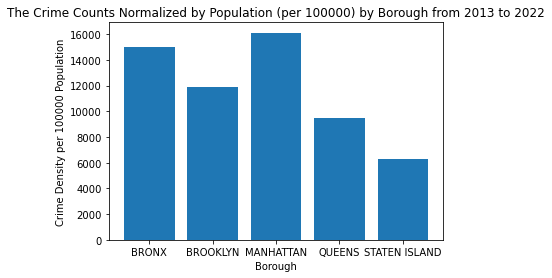

In [11]:
# plot as a bar plot
plt.bar(crimeByBoroughPop['BORO_NM'],crimeByBoroughPop['CrimeDensity'])
plt.title('The Crime Counts Normalized by Population (per 100000) by Borough from 2013 to 2022')
plt.xlabel('Borough')
plt.ylabel('Crime Density per 100000 Population')
plt.show()

Interpretations:
1. The Bronx has the highest crime density, indicating that per capita, more crimes were reported in this borough compared to the others.

2. Brooklyn follows as the second-highest in terms of crime density.

3. Staten Island has the lowest crime density among the five boroughs.

4. Lower crime densities do not necessarily mean fewer crimes overall; they indicate fewer crimes relative to the population size

### Geographical Analysis

In [12]:
# make points from given latitudes and longitudes
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(Complaint_data.Longitude, Complaint_data.Latitude)]

geoCrimedata = gpd.GeoDataFrame(Complaint_data,geometry=geometry,crs={'init': 'EPSG:4326'})
geoCrimedata.head()

,CMPLNT_NUM,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,PARKS_NM,Latitude,Longitude,YearMonth,geometry
0,109325830,BRONX,2014-03-25,18:00:00,RAPE,(null),40.887314,-73.847272,2014-03,POINT (-73.84727 40.88731)
1,239164165,BRONX,2022-01-07,22:00:00,RAPE,(null),40.887314,-73.847272,2022-01,POINT (-73.84727 40.88731)
2,238976313,BRONX,2022-01-09,09:00:00,RAPE,(null),40.887314,-73.847272,2022-01,POINT (-73.84727 40.88731)
3,91030599,BRONX,2013-01-01,12:00:00,GRAND LARCENY,(null),40.887314,-73.847272,2013-01,POINT (-73.84727 40.88731)
4,88424270,BRONX,2013-01-04,12:10:00,ROBBERY,(null),40.887314,-73.847272,2013-01,POINT (-73.84727 40.88731)


In [13]:
geoCrimedata = gpd.sjoin(geoCrimedata,zips.to_crs({'init': 'epsg:4326'}), op='within', how='inner')
geoCrimedata = geoCrimedata.drop_duplicates(subset='CMPLNT_NUM')
geoCrimedata.head()

,CMPLNT_NUM,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,PARKS_NM,Latitude,Longitude,YearMonth,geometry,...,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
0,109325830,BRONX,2014-03-25,18:00:00,RAPE,(null),40.887314,-73.847272,2014-03,POINT (-73.84727 40.88731),...,Bronx,68942.0,5.526249e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
1,239164165,BRONX,2022-01-07,22:00:00,RAPE,(null),40.887314,-73.847272,2022-01,POINT (-73.84727 40.88731),...,Bronx,68942.0,5.526249e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
2,238976313,BRONX,2022-01-09,09:00:00,RAPE,(null),40.887314,-73.847272,2022-01,POINT (-73.84727 40.88731),...,Bronx,68942.0,5.526249e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
3,91030599,BRONX,2013-01-01,12:00:00,GRAND LARCENY,(null),40.887314,-73.847272,2013-01,POINT (-73.84727 40.88731),...,Bronx,68942.0,5.526249e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0
4,88424270,BRONX,2013-01-04,12:10:00,ROBBERY,(null),40.887314,-73.847272,2013-01,POINT (-73.84727 40.88731),...,Bronx,68942.0,5.526249e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0


In [14]:
crimeByZip = geoCrimedata[['CMPLNT_NUM','ZIPCODE']].groupby(by = 'ZIPCODE', as_index=False).count()
crimeByZip.rename(columns = {'CMPLNT_NUM':'N_crimes'},inplace=True)

In [15]:
crimeByZipPop = zips.merge(crimeByZip,left_on = 'ZIPCODE',right_on='ZIPCODE')
crimeByZipPop = crimeByZipPop.drop_duplicates(subset='ZIPCODE')
crimeByZipPop['CrimeRate'] = crimeByZipPop['N_crimes']/(crimeByZipPop['POPULATION']/100000)
crimeByZipPop.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,N_crimes,CrimeRate
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",358,1916.385632
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",12387,19842.693749
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",2862,3412.586746
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",11768,20818.369982
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",777,1074.986165


Text(0.5, 1.0, 'The Crime Counts normalized by population (per 100,000)')

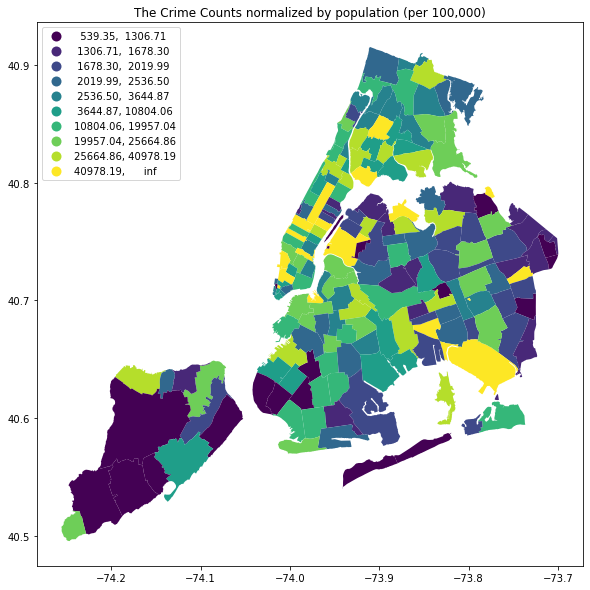

In [16]:
# plot as a heatmap with quantiles color scheme
fig, ax = plt.subplots(1, figsize=(10,10))
crimeByZipPop.to_crs({'init': 'epsg:4326'}).plot(ax=ax, column='CrimeRate',k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})
plt.title('The Crime Counts normalized by population (per 100,000)')

# Data Merging

- Combine the datasets on the 'YearMonth' and 'BORO_NM' fields 
- Ensure the time frames of both datasets align correctly.

In [17]:
 Complaint_data.head()

,CMPLNT_NUM,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,PARKS_NM,Latitude,Longitude,YearMonth
0,109325830,BRONX,2014-03-25,18:00:00,RAPE,(null),40.887314,-73.847272,2014-03
1,239164165,BRONX,2022-01-07,22:00:00,RAPE,(null),40.887314,-73.847272,2022-01
2,238976313,BRONX,2022-01-09,09:00:00,RAPE,(null),40.887314,-73.847272,2022-01
3,91030599,BRONX,2013-01-01,12:00:00,GRAND LARCENY,(null),40.887314,-73.847272,2013-01
4,88424270,BRONX,2013-01-04,12:10:00,ROBBERY,(null),40.887314,-73.847272,2013-01


In [18]:
# Aggregating Complaint Data by 'YearMonth'
Complaint_data_YearMonth = Complaint_data[['CMPLNT_NUM','BORO_NM','YearMonth']].groupby(by = ['YearMonth','BORO_NM'],as_index=False).count()
Complaint_data_YearMonth.rename(columns = {'CMPLNT_NUM':'N_crimes'},inplace=True)
Complaint_data_YearMonth.head()

,YearMonth,BORO_NM,N_crimes
0,2013-01,BRONX,1631
1,2013-01,BROOKLYN,2805
2,2013-01,MANHATTAN,2249
3,2013-01,QUEENS,1976
4,2013-01,STATEN ISLAND,243


In [19]:
# Mapping two dataframe
borough_mapping = {
    'New York County': 'MANHATTAN',
    'Kings County': 'BROOKLYN',
    'Richmond County': 'STATEN ISLAND',
    'Queens County': 'QUEENS',
    'Bronx County': 'BRONX'
}
Unemployment_data['BORO_NM'] = Unemployment_data['Area'].map(borough_mapping)
Unemployment_data.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,YearMonth,BORO_NM
0,Bronx County,2022,1,612200,546100,66100,10.8,2022-01,BRONX
1,Bronx County,2022,2,612400,551600,60800,9.9,2022-02,BRONX
2,Bronx County,2022,3,607800,555000,52800,8.7,2022-03,BRONX
3,Bronx County,2022,4,600700,552800,47900,8.0,2022-04,BRONX
4,Bronx County,2022,5,599000,554700,44300,7.4,2022-05,BRONX


In [20]:
Unemployment_data['YearMonth'] = pd.to_datetime(Unemployment_data['YearMonth']).dt.to_period('M')

In [21]:
Unemployment_data_YearMonth = Unemployment_data[['YearMonth','BORO_NM','Labor Force','Employed',
                                                 'Unemployed','Unemployment Rate']]
Unemployment_data_YearMonth.head()

,YearMonth,BORO_NM,Labor Force,Employed,Unemployed,Unemployment Rate
0,2022-01,BRONX,612200,546100,66100,10.8
1,2022-02,BRONX,612400,551600,60800,9.9
2,2022-03,BRONX,607800,555000,52800,8.7
3,2022-04,BRONX,600700,552800,47900,8.0
4,2022-05,BRONX,599000,554700,44300,7.4


In [22]:
Combine_data = pd.merge(Complaint_data_YearMonth, Unemployment_data_YearMonth, on=['YearMonth', 'BORO_NM'], how='inner')
Combine_data.head()

,YearMonth,BORO_NM,N_crimes,Labor Force,Employed,Unemployed,Unemployment Rate
0,2013-01,BRONX,1631,600600,522600,78000,13.0
1,2013-01,BROOKLYN,2805,1201200,1077200,123900,10.3
2,2013-01,MANHATTAN,2249,897000,820300,76600,8.5
3,2013-01,QUEENS,1976,1133900,1034500,99400,8.8
4,2013-01,STATEN ISLAND,243,219700,197800,21900,10.0


In [23]:
# Save the combined data
Combine_data.to_csv("Combined_data.csv",index=False)

# Correlation Analysis

- Calculate correlation coefficients to explore the relationship between unemployment rates and crime rates.
- Use scatter plots to visualize these relationships.

In [24]:
correlation_matrix = Combine_data.corr()
correlation_matrix

,N_crimes,Labor Force,Employed,Unemployed,Unemployment Rate
N_crimes,1.000000,0.807848,0.798284,0.525745,-0.003033
Labor Force,0.807848,1.000000,0.996297,0.573315,-0.115735
Employed,0.798284,0.996297,1.000000,0.500746,-0.194355
Unemployed,0.525745,0.573315,0.500746,1.000000,0.686925
Unemployment Rate,-0.003033,-0.115735,-0.194355,0.686925,1.000000


N_crimes and Labor Force: There is a strong positive correlation (0.807848), suggesting that as the labor force increases, the number of crimes also tends to increase.

N_crimes and Employed: There is also a strong positive correlation (0.798284) here, indicating that higher employment figures are associated with a higher number of crimes. This might seem counterintuitive, but it could be due to higher population areas having more employed people and, consequently, more crimes.

N_crimes and Unemployed: There is a moderate positive correlation (0.525745), suggesting that higher unemployment may be associated with a higher number of crimes, which aligns with some criminological theories.

N_crimes and Unemployment Rate: There is a very weak negative correlation (-0.003033), which suggests there is almost no linear relationship between the unemployment rate and the number of crimes. This could be due to various socio-economic factors that influence crime rates beyond unemployment alone.

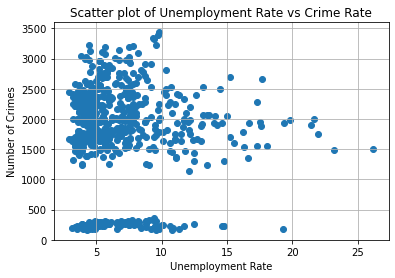

In [25]:
# Scatter plot to visualize the relationship
plt.scatter(Combine_data['Unemployment Rate'], Combine_data['N_crimes'])
plt.title('Scatter plot of Unemployment Rate vs Crime Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

Lack of Trend: 
- The lack of an upward or downward trend indicates that the unemployment rate is not a strong predictor of the number of crimes.